## Data preparation

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [21]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


L'analyse des statistiques descriptives et des visualisations révèle la présence d'outliers dans plusieurs variables. Par exemple, le nombre moyen de pièces (AveRooms) présente des valeurs extrêmes, allant jusqu'à 141 pièces par maison, bien au-delà des valeurs attendues. De même, la population (Population) atteint des valeurs élevées jusqu'à 35 682, ce qui peut indiquer des zones fortement peuplées ou des erreurs de données. Ces outliers peuvent influencer l'entraînement des modèles et nécessitent une gestion, soit par suppression, soit par transformation, selon l'impact sur le modèle.

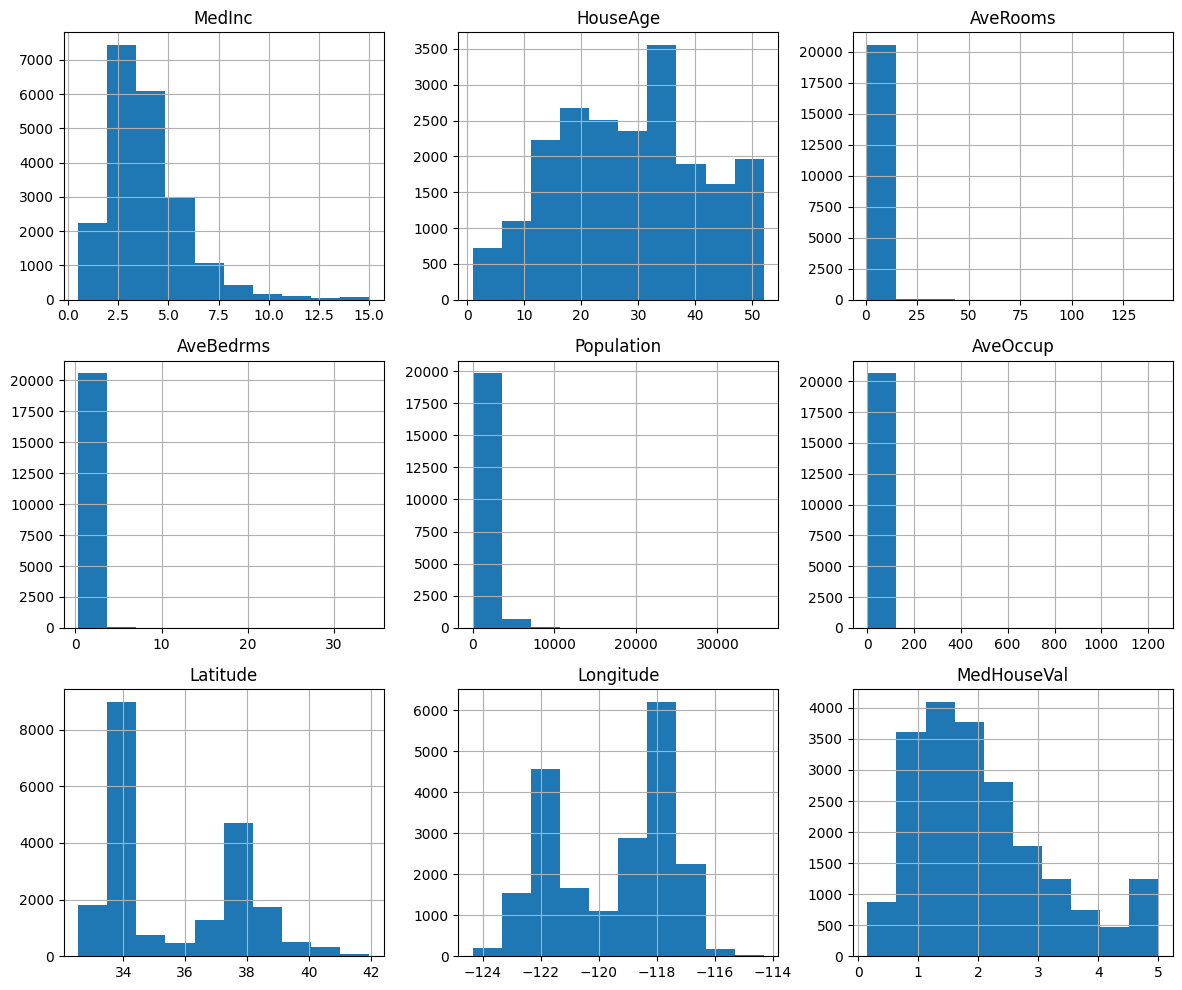

In [22]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

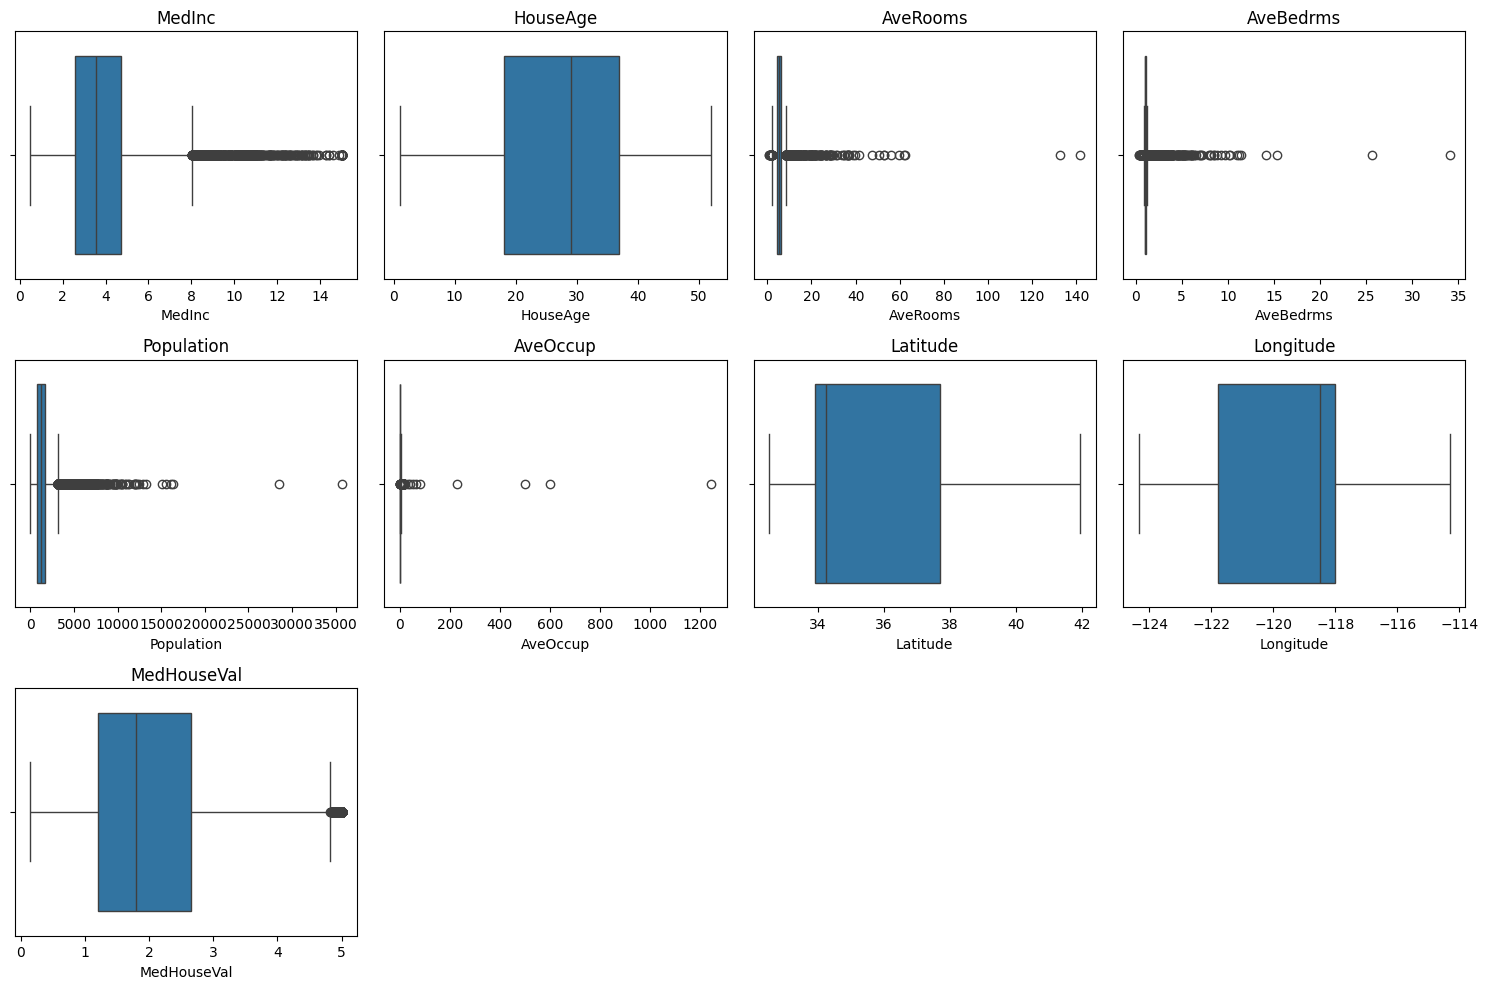

In [23]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

Le boxplot montre des valeurs aberrantes évidentes dans plusieurs variables, comme AveRooms, AveBedrms, et Population, où les données s'étendent largement au-delà des whiskers, suggérant des anomalies et des extrêmes.

In [24]:
df = df[(df['AveRooms'] < 30) & (df['AveBedrms'] < 10) & (df['Population'] < 10000)]

Les seuils ont été choisis pour éliminer les valeurs aberrantes tout en maintenant une représentativité des données. Un seuil de 30 pièces pour AveRooms permet d'exclure les logements excessivement grands. 10 chambres pour AveBedrms et 10,000 habitants pour Population couvrent les maisons et zones réalistes tout en éliminant les extrêmes.

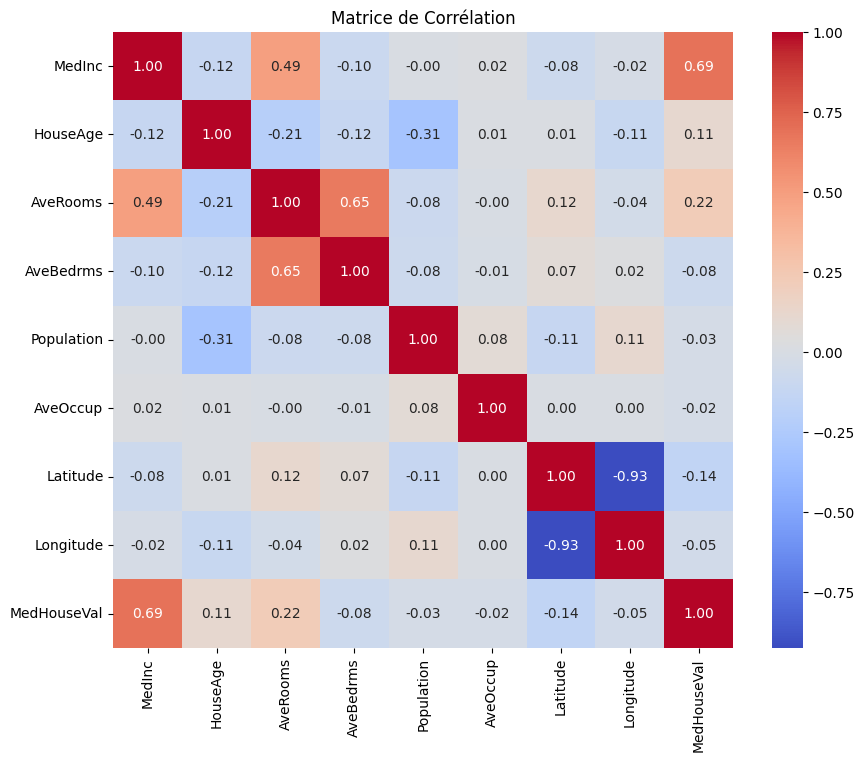

In [25]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

La matrice de corrélation montre que MedInc (revenu médian) et AveRooms (nombre moyen de pièces) ont des corrélations fortes avec MedHouseVal (prix médian des maisons), ce qui les rend particulièrement significatifs pour la prédiction du prix des maisons. En revanche, AveBedrms (nombre moyen de chambres) a une faible corrélation avec le prix, indiquant que ce facteur a un impact moins significatif.

Quant aux variables géographiques, la Latitude et la Longitude ont une corrélation très faible avec MedHouseVal, ce qui peut s'expliquer par le fait que toutes les maisons dans le jeu de données se trouvent en Californie, limitant ainsi l'impact de la localisation géographique sur le prix des maisons.

Enfin, la Population n'a que très peu d'impact sur le prix des maisons, comme le montre la faible corrélation avec MedHouseVal.

Ces informations sont cruciales pour sélectionner les features les plus pertinents lors de la modélisation du prix des maisons.

In [27]:
from sklearn.model_selection import train_test_split

X = df[["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]] 
y = df['MedHouseVal'] 

# Diviser les données en entraînement et test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ensemble d'entraînement : {X_train.shape[0]} échantillons")
print(f"Ensemble de test : {X_test.shape[0]} échantillons")

Ensemble d'entraînement : 16474 échantillons
Ensemble de test : 4119 échantillons


In [28]:
import os

# Créer le dossier 'data' au niveau du projet, en dehors de 'notebooks'
data_dir = os.path.join(os.getcwd(), '../data/')

# Créer le dossier 'data' s'il n'existe pas
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Sauvegarder les ensembles de données dans des fichiers CSV
X_train.to_csv(os.path.join(data_dir, 'X_train.csv'), index=False)
X_test.to_csv(os.path.join(data_dir, 'X_test.csv'), index=False)
y_train.to_csv(os.path.join(data_dir, 'y_train.csv'), index=False)
y_test.to_csv(os.path.join(data_dir, 'y_test.csv'), index=False)

print("Les ensembles d'entraînement et de test ont été enregistrés dans le dossier 'Std data'.")

Les ensembles d'entraînement et de test ont été enregistrés dans le dossier 'Std data'.
